In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys  
sys.path.insert(0, 'imbalance-model')
from feature_engineering import *
from train import *
from scipy import stats

In [2]:
import os
path = os.path.isfile('data.parquet')
if path == True:
    data = pd.read_parquet('data.parquet')
else:
    data = feature_pipeline("train")
    # outputs a merge of main, frequency and indicator
    # data.to_csv('data.csv',index=False)
    parquet_file = 'data.parquet'
    data.to_parquet(parquet_file, engine = 'pyarrow', compression = 'gzip')
# data.set_index('ts',inplace=True)
data.head()

ts  forecast_solar  forecast_consumption  imbalance   
0 2022-06-23 00:00:00+02:00             0.0               47138.0  -2844.981  \
1 2022-06-23 00:15:00+02:00             0.0               46841.0  -2686.826   
2 2022-06-23 00:30:00+02:00             0.0               46412.0  -2697.048   
3 2022-06-23 00:45:00+02:00             0.0               46065.0  -2782.877   
4 2022-06-23 01:00:00+02:00             0.0               45611.0  -2617.557   

   forecast_wind  solar_delayed  wind_delayed  consumption_actual_delayed   
0         5593.0    5378.753433  13855.332835                53195.966184  \
1         5183.0    5378.753433  13855.332835                53195.966184   
2         5032.0       0.000000   5336.000000                46434.000000   
3         4876.0       0.000000   5131.000000                45784.000000   
4         4735.0       0.000000   4945.000000                45175.000000   

   prl_up_delayed  prl_down_delayed  afrr_up_delayed  afrr_down_delayed   
0       46.409599         41.718294        79.993861         101.765991  \
1       46.409599         41.718294        79.993861         101.765991   
2       82.040000          0.775000        63.649000           8.100000   
3       15.740000         70.416000       133.120000           2.456000   
4       24.254000         76.663000       136.034000           2.759000   

   mfrr_up_delayed  mfrr_down_delayed  imbalance_delayed  frequency_q90   
0         1.426156              0.439         -43.613301          0.022  \
1         1.426156              0.439         -43.613301          0.022   
2         0.000000              0.000       -2844.981000          0.000   
3         0.000000              0.000       -2686.826000          0.026   
4         0.000000              0.000       -2697.048000          0.000   

   frequency_q10  indicator  
0         -0.042        0.0  
1          0.000        0.0  
2          0.000        0.0  
3          0.000        0.0  
4         -0.034        0.0

<AxesSubplot:>

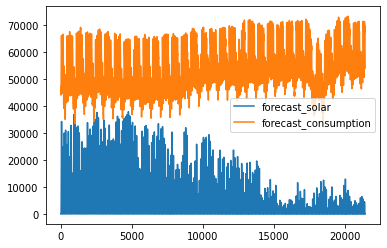

In [7]:
# data.set_index('ts',inplace=True)
data[['forecast_solar','forecast_consumption']].plot()
# data.set_index('ts',inplace=True)
# plt.xlim(['2022-06-23','2022-06-30'])

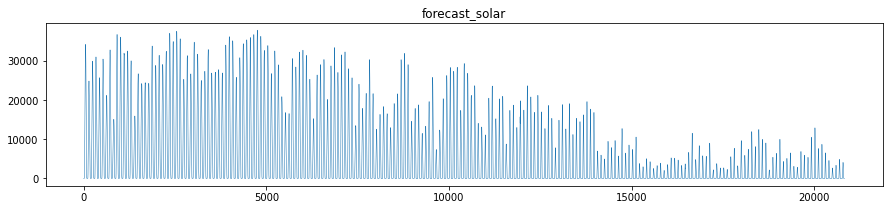

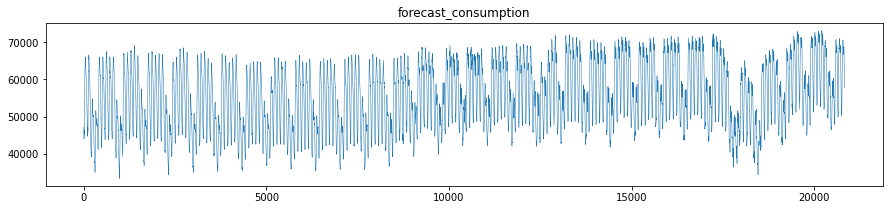

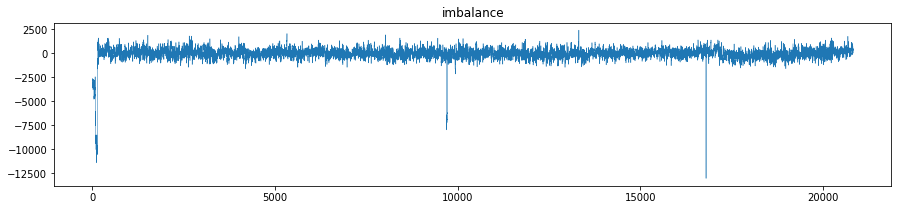

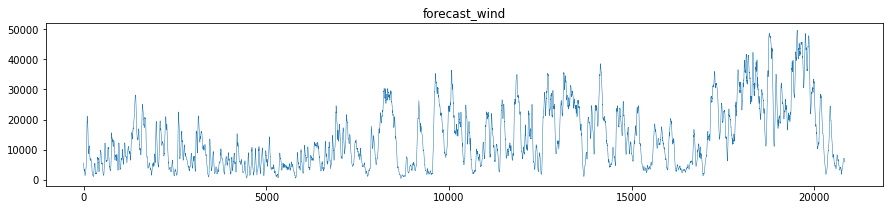

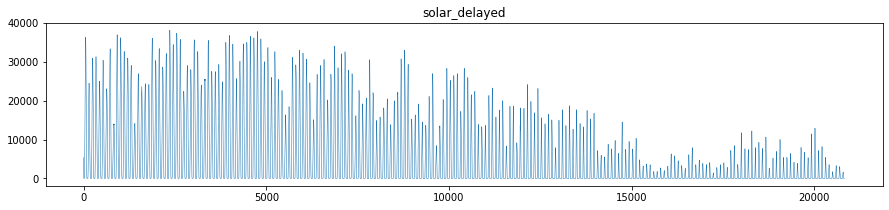

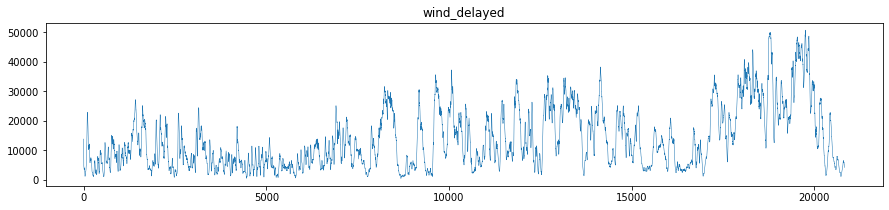

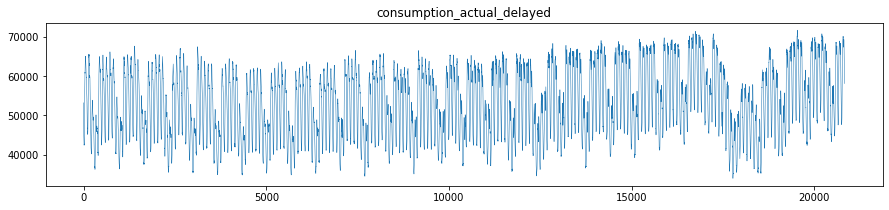

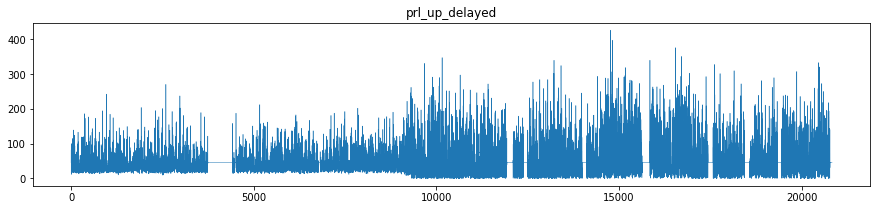

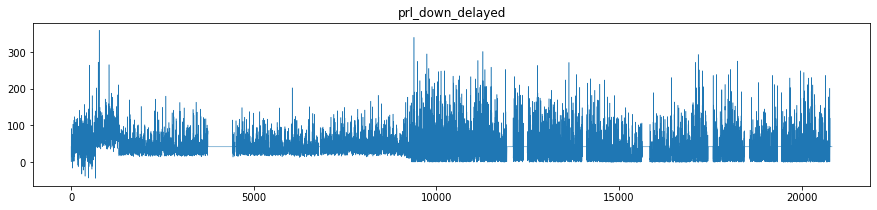

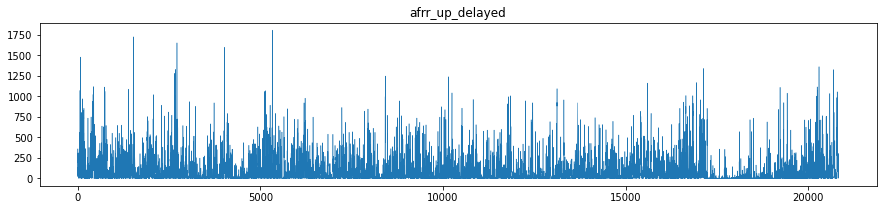

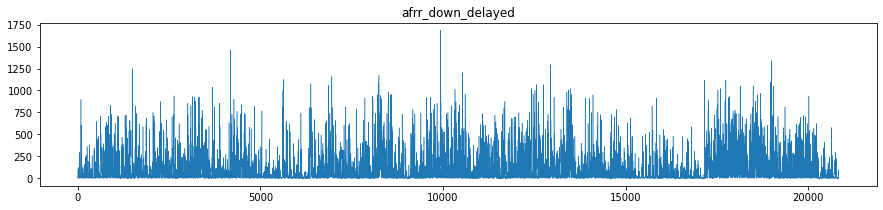

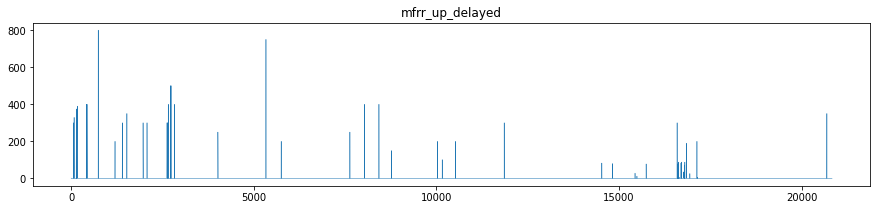

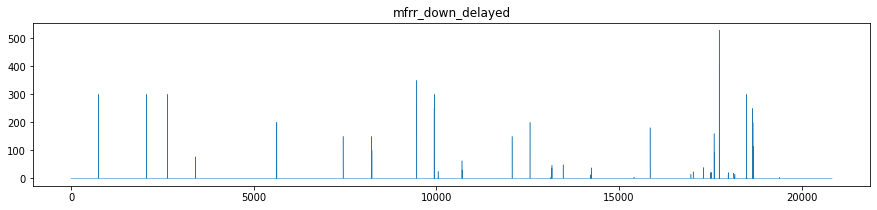

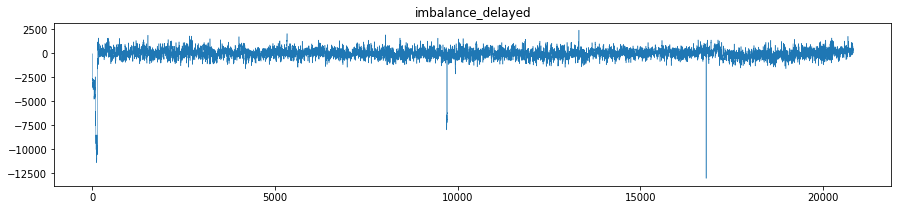

In [3]:
weeks = 31 #max weeks = len(data)/4/24/7 = 31.863
days = int(weeks*7) #max days = len(data)/4/24 = 223.04167
hours = int(days*24) #max hours = len(data)/4 = 5353
window_size = int(4*hours)


markersize = 2
markevery = 1
lw = 0.5

length = 15
height = 3

for feature in list(data.columns)[1:-3]:
    plt.figure(figsize=(length,height))
    plt.plot(data[str(feature)][:window_size],'-',markersize=markersize,markevery=markevery,lw=lw)
    plt.title(str(feature))
    # plt.xticks(range(0, window_size, int(window_size/days)),np.arange(0,days))
    # plt.xlabel(range(0, 25, 4))
    plt.show()

In [4]:
corr_matrix = data.drop(columns='ts').corr()
print(corr_matrix)

                            forecast_solar  forecast_consumption  imbalance   
forecast_solar                    1.000000              0.329379  -0.005731  \
forecast_consumption              0.329379              1.000000   0.061038   
imbalance                        -0.005731              0.061038   1.000000   
forecast_wind                    -0.266177              0.081275  -0.084255   
solar_delayed                     0.986536              0.317092  -0.010706   
wind_delayed                     -0.268325              0.071480  -0.092611   
consumption_actual_delayed        0.320273              0.965408   0.065007   
prl_up_delayed                   -0.104930              0.113944   0.054509   
prl_down_delayed                  0.031657             -0.096973  -0.054411   
afrr_up_delayed                   0.016719              0.129463   0.187912   
afrr_down_delayed                 0.120988              0.022255  -0.215957   
mfrr_up_delayed                   0.078480          

<AxesSubplot:>

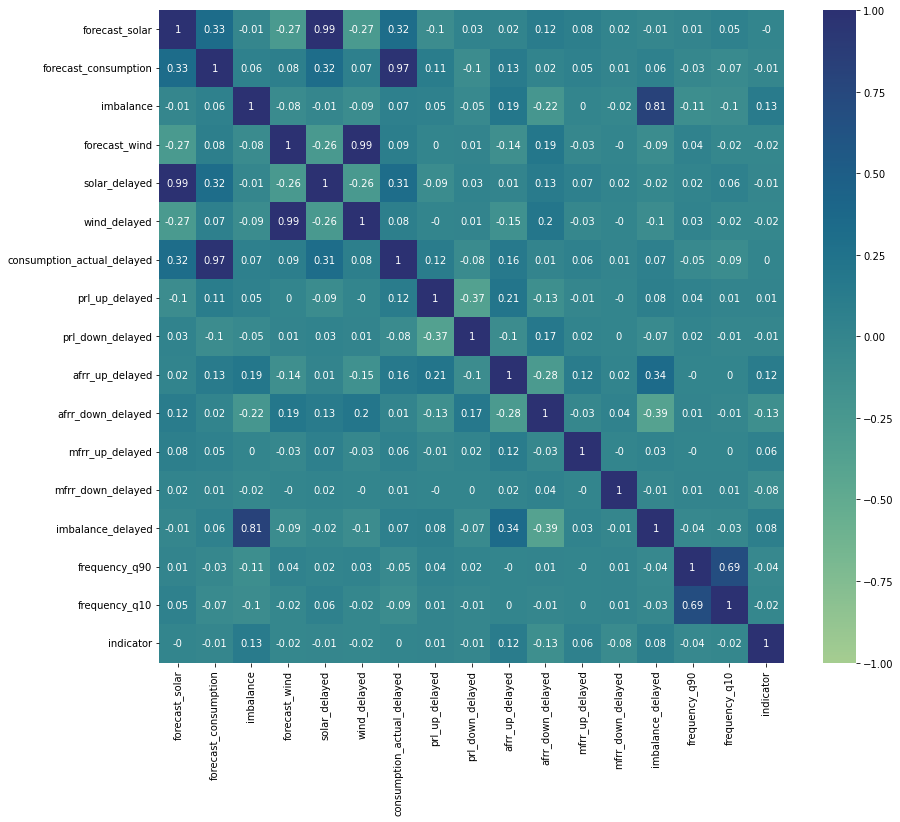

In [5]:
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(np.round(corr_matrix,2), annot=True,vmin=-1,vmax=1,cmap="crest")

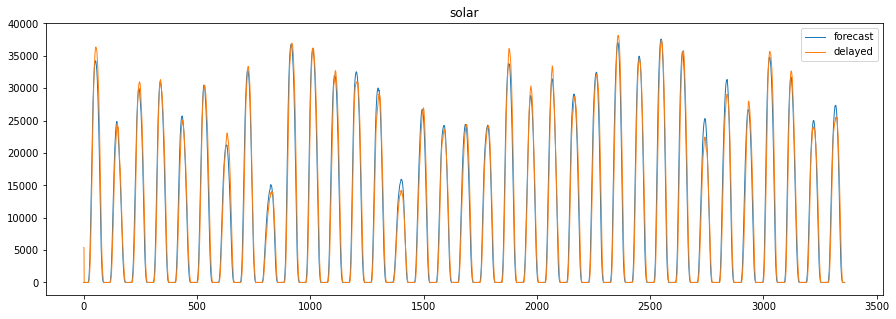

In [6]:
weeks = 5 #max weeks = len(data)/4/24/7 = 31.863
days = int(weeks*7) #max days = len(data)/4/24 = 223.04167
hours = int(days*24) #max hours = len(data)/4 = 5353
window_size = int(4*hours)


markersize = 2
markevery = 1
lw = 1

length = 15
height = 5

plt.figure(figsize=(length,height))

for feature in ['forecast_solar','solar_delayed']:
    # plt.figure(figsize=(length,height))
    plt.plot(data[str(feature)][:window_size],'-',markersize=markersize,markevery=markevery,lw=lw)
    plt.title(str(feature))
    plt.title('solar')
    plt.legend(['forecast','delayed'])
    # plt.xticks(range(0, window_size, int(window_size/days)),np.arange(0,days))
    # plt.xlabel(range(0, 25, 4))
plt.show()

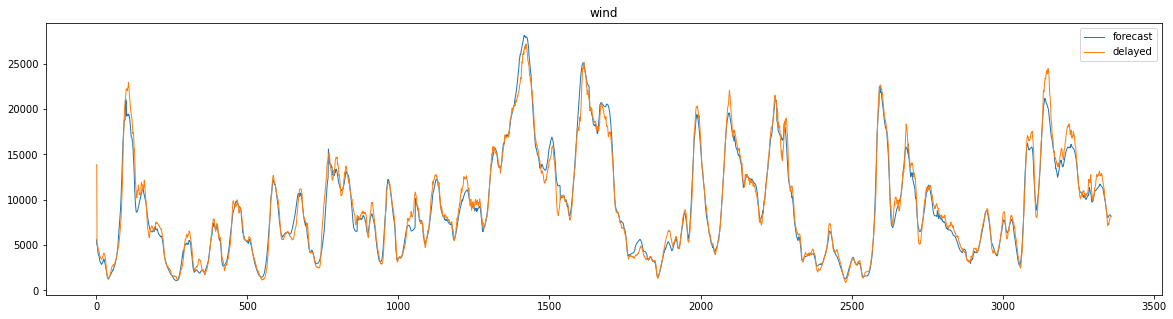

In [7]:
weeks = 5 #max weeks = len(data)/4/24/7 = 31.863
days = int(weeks*7) #max days = len(data)/4/24 = 223.04167
hours = int(days*24) #max hours = len(data)/4 = 5353
window_size = int(4*hours)


markersize = 2
markevery = 1
lw = 1

length = 20
height = 5

plt.figure(figsize=(length,height))

for feature in ['forecast_wind','wind_delayed']:
    # plt.figure(figsize=(length,height))
    plt.plot(data[str(feature)][:window_size],'-',markersize=markersize,markevery=markevery,lw=lw)
    plt.title(str(feature))
    plt.title('wind')
    plt.legend(['forecast','delayed'])
    # plt.xticks(range(0, window_size, int(window_size/days)),np.arange(0,days))
    # plt.xlabel(range(0, 25, 4))
plt.show()

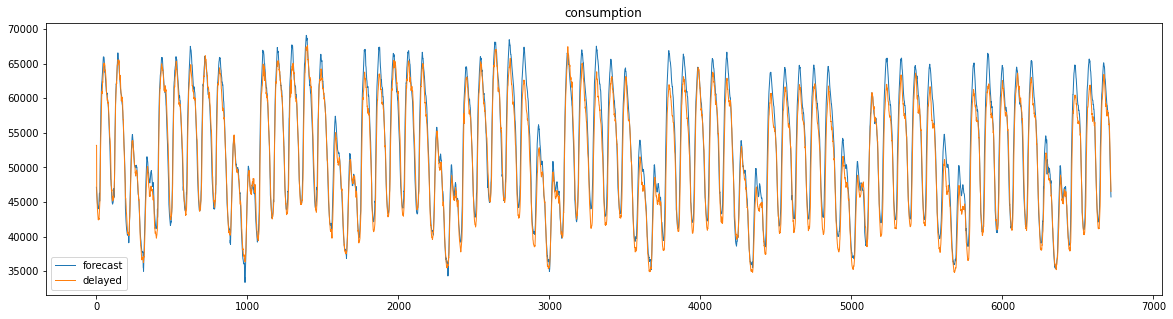

In [8]:
weeks = 10 #max weeks = len(data)/4/24/7 = 31.863
days = int(weeks*7) #max days = len(data)/4/24 = 223.04167
hours = int(days*24) #max hours = len(data)/4 = 5353
window_size = int(4*hours)


markersize = 2
markevery = 1
lw = 1

length = 20
height = 5

plt.figure(figsize=(length,height))

for feature in ['forecast_consumption','consumption_actual_delayed']:
    # plt.figure(figsize=(length,height))
    plt.plot(data[str(feature)][:window_size],'-',markersize=markersize,markevery=markevery,lw=lw)
    plt.title(str(feature))
    plt.title('consumption')
    plt.legend(['forecast','delayed'])
    # plt.xticks(range(0, window_size, int(window_size/days)),np.arange(0,days))
    # plt.xlabel(range(0, 25, 4))
plt.show()

In [9]:
data = data.assign(holiday=0)
# data_ = data.set_index('ts')
# loop over the list of dates and set weekday to zero for those dates
for date in ['2022-10-03','2022-12-25','2022-12-26','2023-01-01']:
    mask = data['ts'].dt.date == pd.to_datetime(date).date()
    data.loc[mask, 'holiday'] = 1

data.loc[data['ts'] == '2022-10-03']

ts  forecast_solar  forecast_consumption   
9792 2022-10-03 00:00:00+02:00             0.0               46229.0  \

      imbalance  forecast_wind  solar_delayed  wind_delayed   
9792   -527.354        22038.0            0.0       22603.0  \

      consumption_actual_delayed  prl_up_delayed  prl_down_delayed   
9792                     42922.0          39.032            48.259  \

      afrr_up_delayed  afrr_down_delayed  mfrr_up_delayed  mfrr_down_delayed   
9792           12.046              5.547              0.0                0.0  \

      imbalance_delayed  frequency_q90  frequency_q10  indicator  holiday  
9792            379.603         -0.043         -0.065        0.0        1

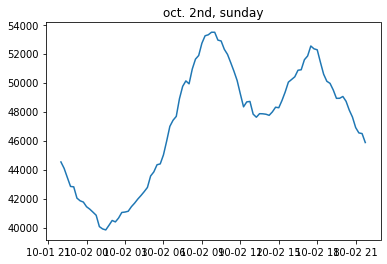

In [10]:
data_ = data.set_index('ts')
date = '2022-10-02' #sunday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]

plt.plot(selected_rows['forecast_consumption'])
plt.title('oct. 2nd, sunday')
plt.show()

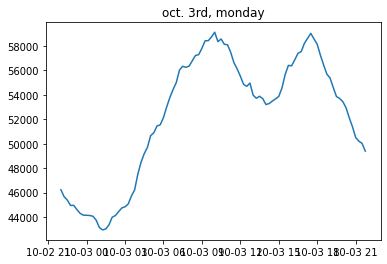

In [11]:
data_ = data.set_index('ts')
date = '2022-10-03'

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]

plt.plot(selected_rows['forecast_consumption'])
plt.title('oct. 3rd, monday')
plt.show()

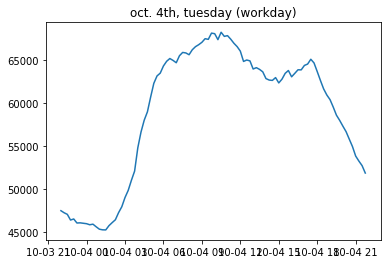

In [12]:
data_ = data.set_index('ts')
date = '2022-10-04'

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]

plt.plot(selected_rows['forecast_consumption'])
plt.title('oct. 4th, tuesday (workday)')
plt.show()

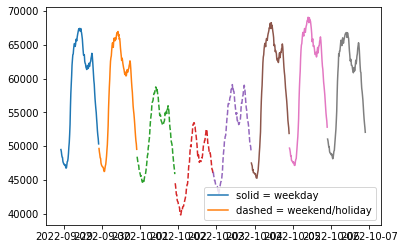

In [13]:
data_ = data.set_index('ts')
date = '2022-09-29' #thursday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])

data_ = data.set_index('ts')
date = '2022-09-30' #friday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])

data_ = data.set_index('ts')
date = '2022-10-01' #saturday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'],'--')

data_ = data.set_index('ts')
date = '2022-10-02' #sunday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'],'--')

data_ = data.set_index('ts')
date = '2022-10-03' #monday (public holiday)

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'],'--')


data_ = data.set_index('ts')
date = '2022-10-04' #tuesday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])

data_ = data.set_index('ts')
date = '2022-10-05' #wednesday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])


data_ = data.set_index('ts')
date = '2022-10-06' #thursday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])


plt.legend(['solid = weekday','dashed = weekend/holiday'])
plt.show()

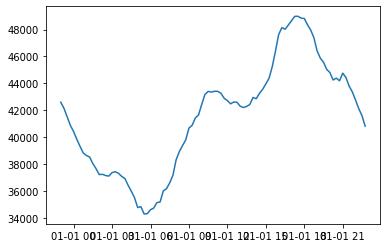

In [14]:
data_ = data.set_index('ts')
date = '2023-01-01' #thursday

# select all rows with date '2022-10-03'
date_to_select = pd.to_datetime(date)
selected_rows = data_.loc[data_.index.date == date_to_select.date()]
plt.plot(selected_rows['forecast_consumption'])

plt.show()

In [18]:
# df = pd.read_parquet(f"data/train/frequency.parquet")
# df["ts_15min"] = floor_datetime(df["ts"])
# df["va"] -= 50
# df["va"] = np.where(df["va"].abs() <= 0.02, 0, df["va"])
# df = df.loc[(df["ts"] - pd.to_timedelta(5, unit="min")) <= df["ts_15min"]]
# df_group = df.groupby('ts_15min', as_index=False)
# df['ts_15min'] = pd.to_datetime(df['ts_15min'])
# df = (
#         df.groupby("ts_15min", as_index=False)
#     )

In [180]:
# def aggregate_frequency(df: pd.DataFrame) -> pd.DataFrame:
#     from sklearn.linear_model import LinearRegression
#     df["ts_15min"] = floor_datetime(df["ts"])
#     df["va"] -= 50
#     df["va"] = np.where(df["va"].abs() <= 0.02, 0, df["va"])
#     df = df.loc[(df["ts"] - pd.to_timedelta(5, unit="min")) <= df["ts_15min"]]
#     df = (
#         df.groupby("ts_15min", as_index=False)
#         .agg(frequency_q90=("va", q90), frequency_q10=("va", q10))
#         .rename(columns={"ts_15min": "ts"})
#     )
#     return df

In [ ]:
# def lin_reg(x):
#     from sklearn.linear_model import LinearRegression
#     X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
#     # y = 1 * x_0 + 2 * x_1 + 3
#     y = np.dot(X, np.array([1, 2]))
#     reg = LinearRegression().fit(X, y)
#     reg.score(X, y)
#     return x.dot(w)

In [181]:
# frequency = pd.read_parquet(f"data/train/frequency.parquet")
# frequency = aggregate_frequency(frequency)

In [182]:
# frequency.shape

(21412, 3)

In [183]:
# frequency.head(20)

ts  frequency_q90  frequency_q10
0  2022-06-23 00:00:00+02:00          0.022         -0.042
1  2022-06-23 00:15:00+02:00          0.022          0.000
2  2022-06-23 00:30:00+02:00          0.000          0.000
3  2022-06-23 00:45:00+02:00          0.026          0.000
4  2022-06-23 01:00:00+02:00          0.000         -0.034
5  2022-06-23 01:15:00+02:00          0.000          0.000
6  2022-06-23 01:30:00+02:00          0.023          0.000
7  2022-06-23 01:45:00+02:00          0.021          0.000
8  2022-06-23 02:00:00+02:00          0.000         -0.045
9  2022-06-23 02:15:00+02:00          0.000          0.000
10 2022-06-23 02:30:00+02:00          0.000          0.000
11 2022-06-23 02:45:00+02:00          0.031          0.000
12 2022-06-23 03:00:00+02:00          0.000         -0.030
13 2022-06-23 03:15:00+02:00          0.021          0.000
14 2022-06-23 03:30:00+02:00          0.025          0.000
15 2022-06-23 03:45:00+02:00          0.024          0.000
16 2022-06-23 04:00:00+02:00          0.000          0.000
17 2022-06-23 04:15:00+02:00          0.027          0.000
18 2022-06-23 04:30:00+02:00          0.000          0.000
19 2022-06-23 04:45:00+02:00          0.020          0.000